In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

55.28225358766349 -105.6431971600564
-52.77491508180428 -162.40728662554008
17.89475631435255 -57.265189746999326
83.23390910348715 -14.05902171192514
7.792020610953429 3.335808579270008
-38.38067606150454 -139.97415615354495
-52.08034687137664 -40.89581597670204
84.0157420438536 52.88481159105973
9.610617057098423 62.08421391925097
23.32669961528832 -51.56364704058447
-71.12074295073403 73.84925577152401
-16.6185016317104 27.041720455218268
57.800350119577246 -42.49000831623249
4.5562066051190016 68.92052498021417
20.034351291644327 -171.1925215848085
61.14539996203936 111.82237000719851
-72.15313246020607 74.4512852415883
-68.8861758744126 112.91309935788661
23.281983119421326 55.72711158887472
22.60063700159627 -171.0642548619544
53.74767816884594 -115.34883073524126
53.434400256867065 -161.3485729973288
19.349719677922636 119.24283799457191
42.85568170861194 -21.690966698274963
-37.483902812698155 15.778154220678545
12.232336864986664 -40.919552278796886
86.19048592495696 -168.3787

6.656541623303951 -94.40171123654807
-70.39498152323047 -4.249953950578913
83.3786988684468 90.60357874858965
-41.52328142741983 -119.80255572504606
-71.33139086044905 -47.413070084405206
-64.71402125786014 8.410905842294966
86.00089574741114 -140.17019004995302
55.78036133323221 177.9949531694612
-17.988557988293593 35.3163562914923
15.959153012862117 6.134496526956497
-10.452593220473986 -170.90588460210475
61.71636794230463 -33.721396657072205
-55.20080240045706 43.44406270090491
3.102608507461582 -159.44583601326008
85.32069435258458 -96.6756485676334
12.393128768105939 179.9487690026881
51.85622380922365 84.85365663404349
20.840652793291653 -63.50337045158621
-79.52411149191754 -89.34630793596381
-40.40333154017709 -82.56863653655226
-80.44207382685498 13.404616110109345
-75.61549222008321 -102.77504637517126
-82.60882017425568 -54.75738702039142
26.93045300283127 -138.49023212274102
-57.011146951694286 96.46364418386247
72.41023094137987 109.28190347089259
-67.07619989232333 88.8

73.88615529933182 44.60747689844365
-38.93195356175932 -69.43406732016516
9.567433072271783 172.29008752449607
54.605166123184176 92.8262153320934
44.51281796832308 -88.46988285265618
-47.924542619736975 -51.91703639688916
22.48350982146441 55.82702026768075
32.99166440443254 4.906976148335616
8.773456740555176 169.11993356917054
-44.028576354093396 128.77040513358412
-54.17964211666512 54.262534741350834
44.60390747072415 115.87062690631433
-5.3019259758846005 99.72102037985604
51.87342424022819 37.43500242922741
-80.23017772823592 -33.59671015944883
30.587263722285414 -76.86417349291918
-61.56432280797489 -55.19222282275527
0.9965589227715697 -80.74197408718577
2.9286984734483354 62.33219295987362
43.73568144620464 -42.257685057980154
59.976260133322086 -62.423815882964746
33.42543216842664 -14.912469870477935
72.26747960688292 174.75246898190517
16.819189294369608 -171.05079765552216
-1.0228960474488389 1.6401521879775771
65.29221081442418 163.91475297034157


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la ronge
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | eruwa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | choma
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | mahibadhoo
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | peleduy
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | abu dhabi
Processing Record 19 of Set 1 | whitecourt
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | davila
Processing 

Processing Record 40 of Set 4 | eldikan
City not found. Skipping...
Processing Record 41 of Set 4 | chapada dos guimaraes
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | orda
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | lahij
Processing Record 48 of Set 4 | saravan
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | batemans bay
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | gotsu
Processing Record 4 of Set 5 | mizdah
Processing Record 5 of Set 5 | neuquen
Processing Record 6 of Set 5 | challapata
Processing Record 7 of Set 5 | apollonia
Processing Record 8 of Set 5 | makakilo city
Processing Record 9 of Set 5 | erbaa
Processing Record 10 of Set 5 | eureka
Processing Record 11 of Set 5 | berdyuzhye
City not found. Skipping...
Processing Record 12 of Set 5 | alotau
City no

Processing Record 26 of Set 8 | aykhal
Processing Record 27 of Set 8 | hami
Processing Record 28 of Set 8 | ozernovskiy
Processing Record 29 of Set 8 | ponta delgada
Processing Record 30 of Set 8 | nagato
Processing Record 31 of Set 8 | zhigansk
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | sobolevo
Processing Record 35 of Set 8 | ati
Processing Record 36 of Set 8 | alghero
Processing Record 37 of Set 8 | ust-omchug
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | umm lajj
Processing Record 40 of Set 8 | provideniya
Processing Record 41 of Set 8 | tommot
Processing Record 42 of Set 8 | lianyuan
Processing Record 43 of Set 8 | broome
Processing Record 44 of Set 8 | lidkoping
Processing Record 45 of Set 8 | alugan
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | smithers
Processing Record 48 of Set 8 | merauke
Processing Record 49 of Set 8 | constitucion
Processing Recor

Processing Record 17 of Set 12 | kamaishi
Processing Record 18 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 19 of Set 12 | bandarbeyla
Processing Record 20 of Set 12 | santa rosa
Processing Record 21 of Set 12 | macas
Processing Record 22 of Set 12 | brownsville
Processing Record 23 of Set 12 | alpena
Processing Record 24 of Set 12 | vilyuysk
Processing Record 25 of Set 12 | humaita
Processing Record 26 of Set 12 | chapadinha
Processing Record 27 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 28 of Set 12 | maua
Processing Record 29 of Set 12 | thunder bay
Processing Record 30 of Set 12 | kalmar
Processing Record 31 of Set 12 | uvat
Processing Record 32 of Set 12 | raga
Processing Record 33 of Set 12 | zemio
Processing Record 34 of Set 12 | impfondo
Processing Record 35 of Set 12 | muriwai beach
Processing Record 36 of Set 12 | paamiut
Processing Record 37 of Set 12 | farmington
Processing Record 38 of Set 12 | krasnokamensk
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Ronge,55.1001,-105.2842,53.37,59,17,5.23,CA,2022-09-27 00:09:40
1,Avarua,-21.2078,-159.7750,77.05,94,75,12.66,CK,2022-09-27 00:06:48
2,Saint-Francois,46.4154,3.9054,51.24,93,100,9.22,FR,2022-09-27 00:09:41
3,Eruwa,7.5333,3.4167,72.00,97,100,2.30,NG,2022-09-27 00:09:42
4,Rikitea,-23.1203,-134.9692,68.16,57,34,5.32,PF,2022-09-27 00:09:42
5,Mar Del Plata,-38.0023,-57.5575,59.09,93,96,8.05,AR,2022-09-27 00:05:19
6,Kavaratti,10.5669,72.6420,81.28,73,56,15.39,IN,2022-09-27 00:09:43
7,Codrington,-38.2667,141.9667,53.76,93,100,18.30,AU,2022-09-27 00:09:43
8,Saint-Philippe,-21.3585,55.7679,65.79,74,43,13.71,RE,2022-09-27 00:09:44
9,Choma,-16.8065,26.9531,69.33,33,4,4.47,ZM,2022-09-27 00:09:44


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2022-09-27 00:09:40,55.1001,-105.2842,53.37,59,17,5.23
1,Avarua,CK,2022-09-27 00:06:48,-21.2078,-159.7750,77.05,94,75,12.66
2,Saint-Francois,FR,2022-09-27 00:09:41,46.4154,3.9054,51.24,93,100,9.22
3,Eruwa,NG,2022-09-27 00:09:42,7.5333,3.4167,72.00,97,100,2.30
4,Rikitea,PF,2022-09-27 00:09:42,-23.1203,-134.9692,68.16,57,34,5.32
...,...,...,...,...,...,...,...,...,...
548,Nizwa,OM,2022-09-27 00:24:52,22.9333,57.5333,77.43,66,7,2.75
549,Cheremisinovo,RU,2022-09-27 00:24:53,51.8855,37.2646,49.12,91,100,5.14
550,Muisne,EC,2022-09-27 00:24:53,0.6000,-80.0333,74.21,85,100,8.63
551,Pangnirtung,CA,2022-09-27 00:24:54,66.1451,-65.7125,37.72,58,36,0.38


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

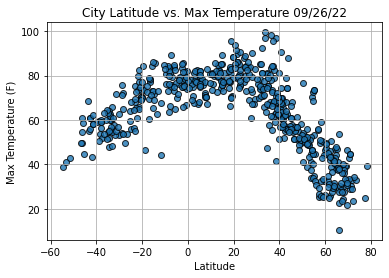

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png", facecolor = "white")

# Show plot.
plt.show()

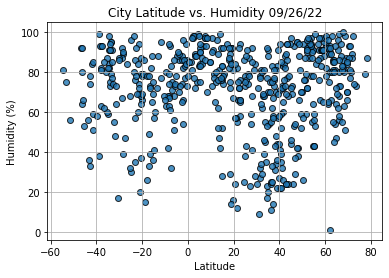

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png", facecolor = "white")
# Show plot.
plt.show()

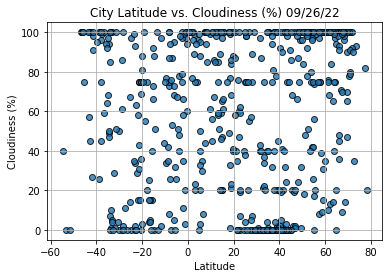

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png", facecolor = "white")
# Show plot.
plt.show()

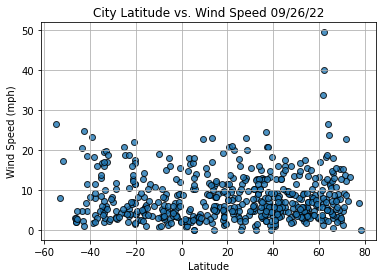

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png", facecolor = "white")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
548     True
549     True
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2022-09-27 00:09:40,55.1001,-105.2842,53.37,59,17,5.23
2,Saint-Francois,FR,2022-09-27 00:09:41,46.4154,3.9054,51.24,93,100,9.22
3,Eruwa,NG,2022-09-27 00:09:42,7.5333,3.4167,72.00,97,100,2.30
6,Kavaratti,IN,2022-09-27 00:09:43,10.5669,72.6420,81.28,73,56,15.39
10,Nanortalik,GL,2022-09-27 00:09:45,60.1432,-45.2371,44.74,94,100,13.24
...,...,...,...,...,...,...,...,...,...
548,Nizwa,OM,2022-09-27 00:24:52,22.9333,57.5333,77.43,66,7,2.75
549,Cheremisinovo,RU,2022-09-27 00:24:53,51.8855,37.2646,49.12,91,100,5.14
550,Muisne,EC,2022-09-27 00:24:53,0.6000,-80.0333,74.21,85,100,8.63
551,Pangnirtung,CA,2022-09-27 00:24:54,66.1451,-65.7125,37.72,58,36,0.38


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2022-09-27 00:09:40,55.1001,-105.2842,53.37,59,17,5.23
2,Saint-Francois,FR,2022-09-27 00:09:41,46.4154,3.9054,51.24,93,100,9.22
3,Eruwa,NG,2022-09-27 00:09:42,7.5333,3.4167,72.00,97,100,2.30
6,Kavaratti,IN,2022-09-27 00:09:43,10.5669,72.6420,81.28,73,56,15.39
10,Nanortalik,GL,2022-09-27 00:09:45,60.1432,-45.2371,44.74,94,100,13.24


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

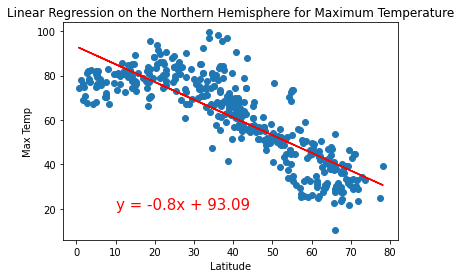

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))


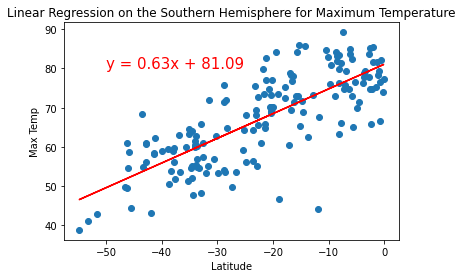

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

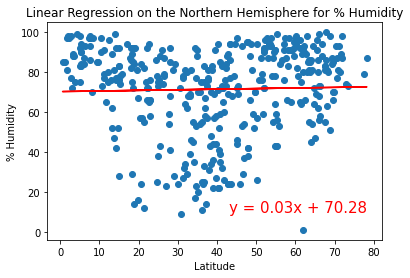

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(43,10))

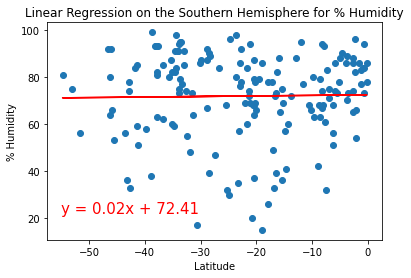

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,22))

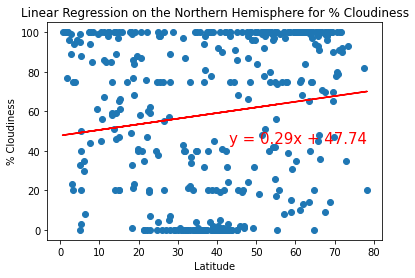

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(43,44))

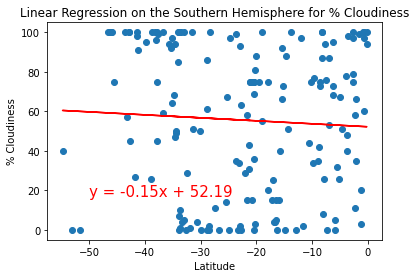

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,17))

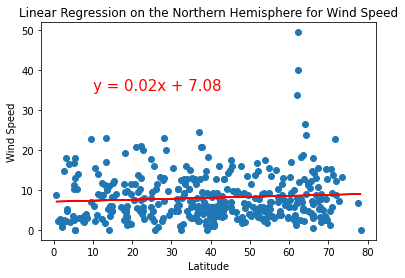

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,35))

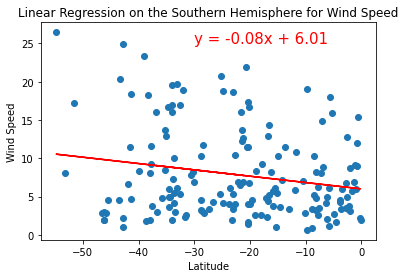

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,25))